Ex1:
Viết hàm có tên là show_stars(rows). Nếu rows là 5, nó sẽ hiện như sau:
o *
o **
o ***
o ****
o *****


In [2]:
def show_star(rows):
    print(rows*"*")
show_star(5)

*****


Ex 2:
Giả sử bạn đang đứng ở tầng trệt (tầng 0) ở tòa nhà 100 tầng. Bạn có 1 con xúc sắc 6 mặt.
Bạn được đặt cược rằng nếu bạn đi được lên tầng 60 trở lên là bạn thắng. Cách đi như sau:
Nếu tung xúc sắc lên:
- Nếu mặt trên cho ra số chấm tròn là 1 hoặc 2 thì bạn đi xuống 1 tầng.
- Nếu mặt trên cho ra số chấm tròn từ 3 đến 5 thì bạn đi lên 1 tầng.
- Nếu mặt trên cho ra số chấm tròn là 6 thì bạn sẽ được tung xúc sắc lại 1 lần nữa, ra bao nhiêu
số chấm tròn thì đi lên bấy nhiêu tầng cho lần đi đó.
Bạn được đi lên 100 lần.

Chú ý:
- Vì 1 lý do gì đó, bạn có khả năng phải đi xuống tầng trệt để đi lại. Khả năng này 0.1%.
- Không có tầng âm, nghĩa là nếu rơi vào số chấm tròn là 1 hoặc 2 mà bạn đang ở tầng
trệt rồi thì bạn sẽ được ở tầng trệt cho lần đi đó.
- Giả định thêm: Xúc sắc bình thường. Bạn được chơi game này bao nhiêu lần tùy điều
kiện của bạn.
Tính xác suất thắng cuộc là bao nhiêu?

In [29]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

In [105]:
floor = 0
for i in range (100):
    dice = np.random.randint(1,7,1)[0]
    if dice in [1,2]:
        floor = max (0, floor -1)
    elif dice in [3,4,5]:
        floor += 1
    else: 
        dice2 = np.random.randint(1,7,1)[0]
        floor += dice2
    if np.random.rand() <= 0.001:
        floor = 0
print(probability)

0.139


## Solution

In [117]:
def get_winner():
    upfloor = 0
    floor = 0
    while upfloor <= 100:
        dice = np.random.randint(1,7,1)[0]
        if dice in [1,2]:
            floor = max(0, floor -1)
        elif dice in [3,4,5]:
            floor += 1
            upfloor += 1
        else: 
            dice2 = np.random.randint(1,7,1)[0]
            upfloor += 1
            floor += dice2
        if np.random.rand() <= 0.001:
            floor = 0
    if floor >= 60:
        return True
    else:
        return False      

In [118]:
n_plays = 1000
winners = []
for i in range(n_plays):
    winners.append(get_winner())
np.array(winners).sum() / n_plays*100

91.60000000000001

Ex3:
Lấy dữ liệu trong file Names.zip đính kèm
- Dùng Pandas đọc và tổng hợp dữ liệu của các năm
- Vẽ biểu đồ tổng số trẻ em sinh ra theo giới tính và năm (Total births by sex and year)
- Tạo subset gồm top 1000 cái tên phổ biến mỗi năm theo từng loại giới tính
- Vẽ biểu đồ số lượng các bé sinh theo năm có các tên sau: Philip, Harry, Elizabeth, Marilyn
- Vẽ biểu đồ thể hiện sự đa dạng trong việc đặt tên qua các năm theo từng giới tính (thể hiện
bằng xu hướng giảm dần từng năm của tổng tỷ lệ % của top 1000 tên phổ biến)
- Vẽ biểu đồ thể hiện sự thay đổi trong cách đặt chữ cái đầu tiên trong tên của nam và nữ qua
các năm 1900, 1960 và 2018
- Xác định xu hướng tên con trai biến thành tên con gái và ngược lại. Lấy ví dụ tên có chữ
“Lesl…” Ban đầu nam đặt nhiều sau đó giảm, nữ ngược lại.

In [238]:
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [467]:
list_path = glob('./Names/*txt')
li = []
for path in list_path:
    df = pd.read_csv(path, names = ['name', 'gender', 'occurrence'])
    df['year'] = path[-8:-4]
    li.append(df)
df = pd.concat(li)

In [468]:
df['year'] = pd.DatetimeIndex(df.year).year
df

,name,gender,occurrence,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
32028,Zylas,M,5,2018
32029,Zyran,M,5,2018
32030,Zyrie,M,5,2018
32031,Zyron,M,5,2018


<AxesSubplot:xlabel='count', ylabel='year'>

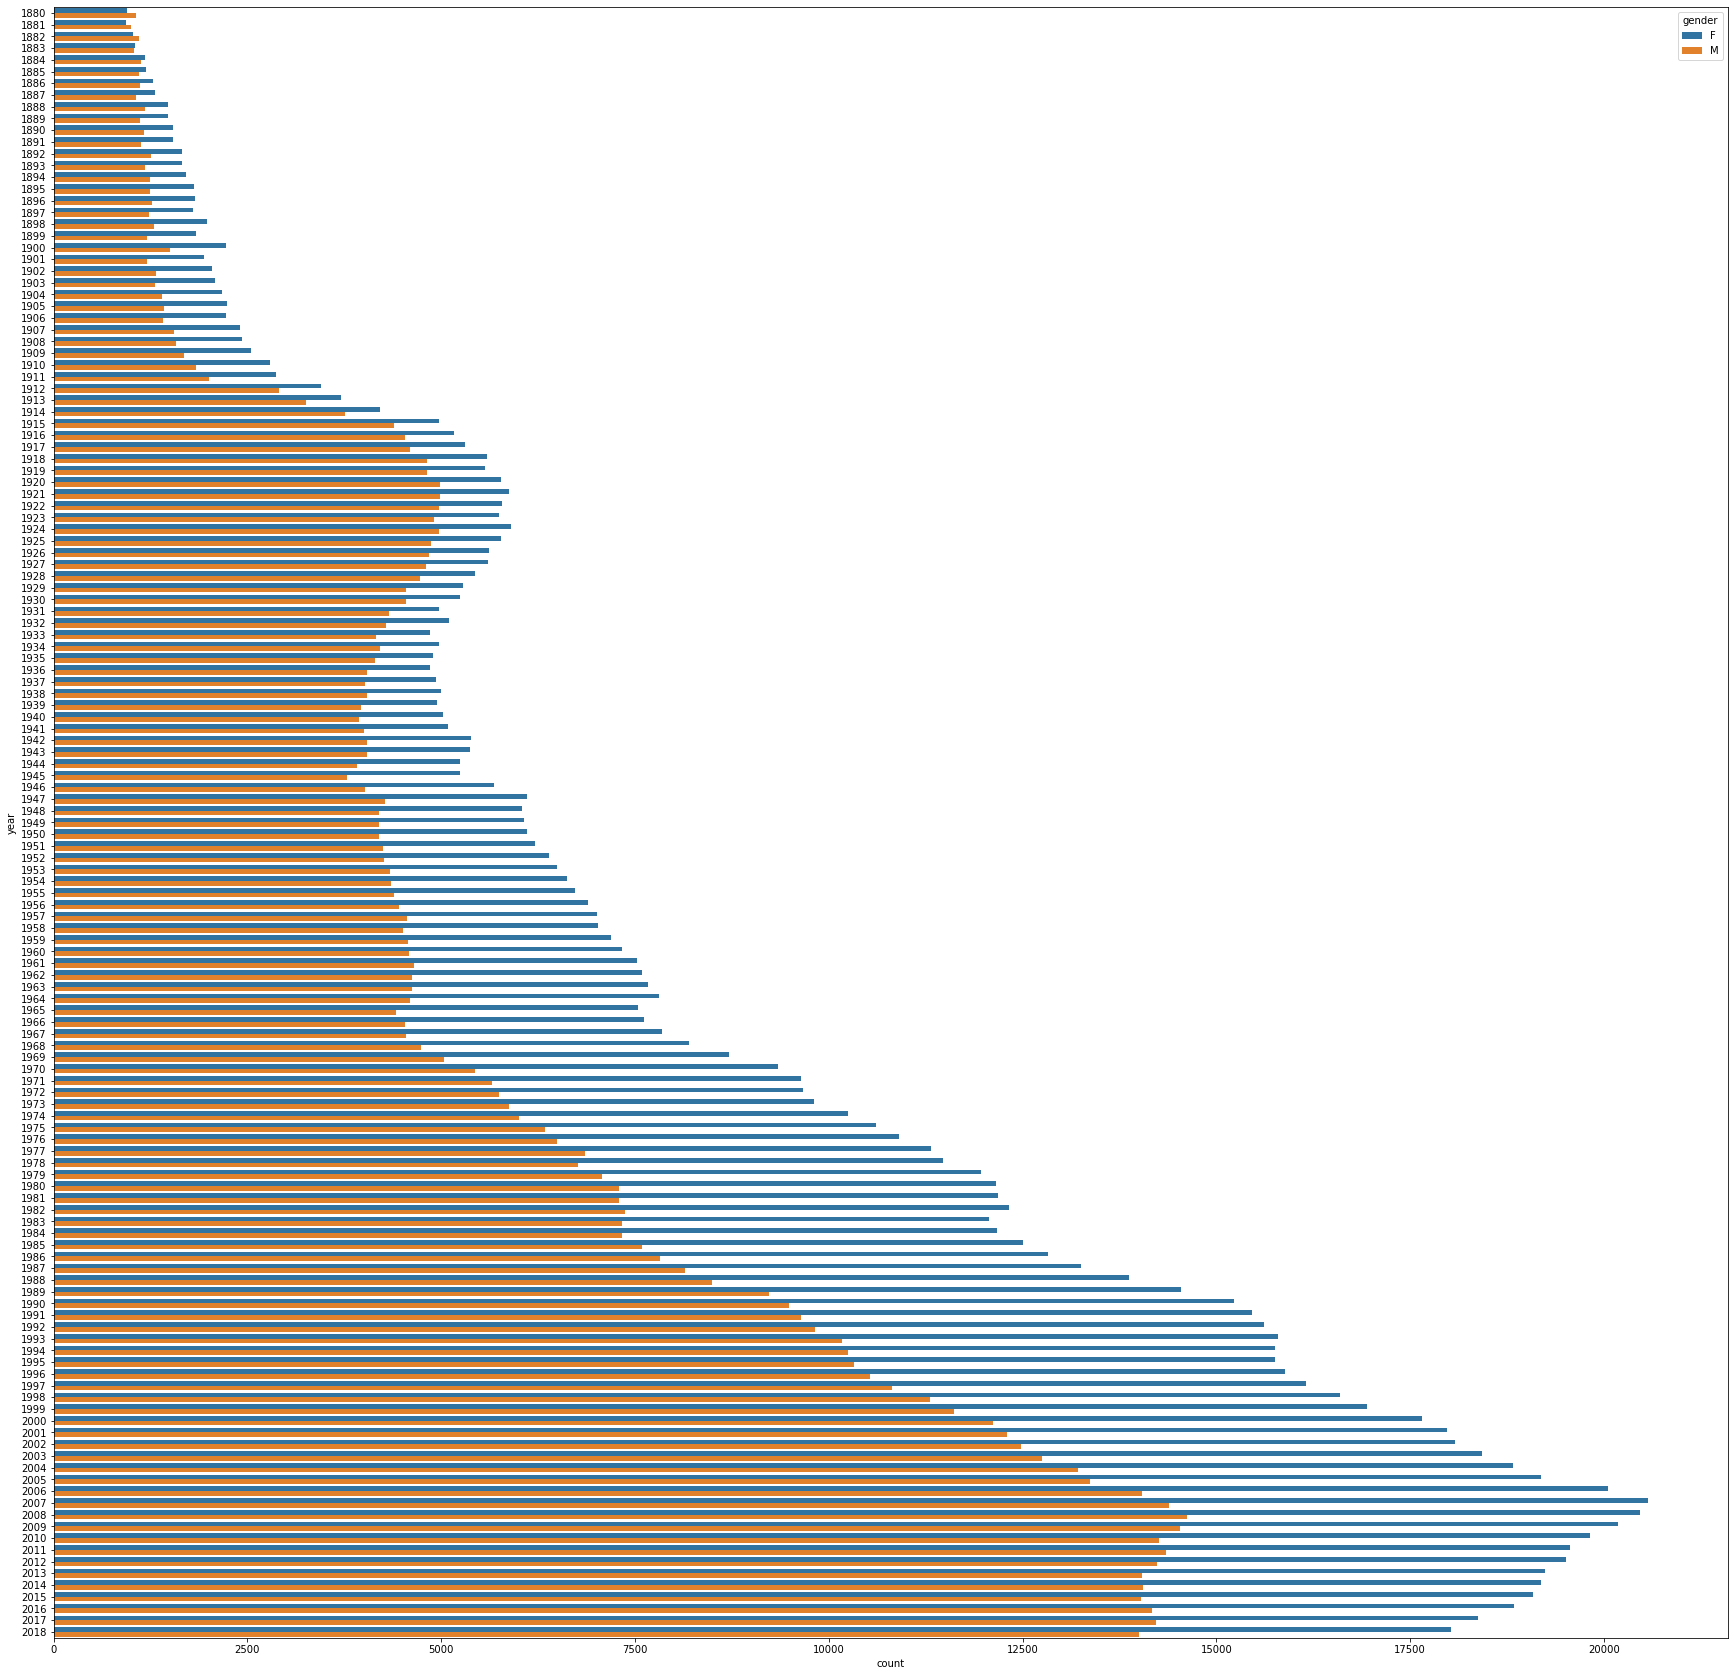

In [39]:
#Vẽ biểu đồ tổng số trẻ em sinh ra theo giới tính và năm (Total births by sex and year)
fig = plt.figure(figsize= (30,30))
fig.add_subplot(1,1,1)
sns.countplot(y='year',data=df,hue="gender")

In [40]:
#Tạo subset gồm top 1000 cái tên phổ biến mỗi năm theo từng loại giới tính

In [235]:
top_name = {}
for i in range(1880,2019):
    li = list(df.query('year == @i').value_counts('name').head(1000).index)
    top_name[i] = li
df_top_name = pd.DataFrame(top_name)

In [127]:
df_top_name

,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Grace,Jessie,Odie,Jessie,Glen,Cecil,Tracy,Ora,Lizzie,Marion,...,Kamdyn,Eden,Jelani,Nour,Kalen,Denym,Mio,Kamarii,Sloan,Shade
1,Emma,James,Lennie,Shirley,Georgia,Hallie,Thomas,Connie,Ivy,Ira,...,Archer,Romie,Kylee,Cobie,Cire,Ripley,Amery,Jaxon,Tilden,Carter
2,Clair,Anna,Lue,Louise,Guadalupe,Grover,Tommie,Pearl,Lonie,Anna,...,Leelynn,Leeland,Dante,Jaye,Clark,Rion,Daley,Miracle,Liam,Amor
3,Florence,Vernie,Mary,Lovie,Grover,Verne,Tom,Dee,Lonnie,Frances,...,Miles,Toby,Raylee,Jaydynn,Riyaan,Cody,Carden,Levy,Jay,Myaire
4,Clara,Vernon,Pearl,Bennie,Grace,Anna,Ida,Percy,Dale,Sidney,...,Cristian,Tobie,Danny,Jaydyn,Riyan,Codie,Stella,Jaxx,Mirza,Jacob
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Charlie,Christopher,Reginald,Reva,Samantha,Roseanna,Kizzie,Vella,Patty,Parker,...,Jaidynn,Bently,Tennyson,Sawyer,Stacy,Basil,Teagyn,Hananiah,Mayan,Mika
996,Charley,Christine,Regina,Reuben,Sam,Roscoe,Orlena,Nevada,Paul,Parlee,...,Bergen,Jaedynn,Jasiah,Smith,Stacey,Beckham,Roen,Skyland,Skylen,Chase
997,Charity,Christina,Reese,Rettie,Salome,Rosanna,Pansy,Norris,Paula,Parrie,...,Jaidyn,Camren,Arley,Magic,Ayven,Simone,Teaghan,Skylan,Barrett,Arrow
998,Chancy,Christie,Reed,Retta,Sally,Rosana,Palmer,Norval,Paulina,Parthenia,...,Jaidon,Jaden,Jasiyah,Sloane,Aza,Bela,Arin,Isra,Makana,Rory


In [391]:
#Vẽ biểu đồ số lượng các bé sinh theo năm có các tên sau: Philip, Harry, Elizabeth, Marilyn
df2 = df.query("name == ['Philip', 'Harry', 'Elizabeth', 'Marilyn']")
df2

,name,gender,occurrence,year
3,Elizabeth,F,1939,1880
784,Harry,F,6,1880
953,Harry,M,2152,1880
1022,Philip,M,186,1880
1590,Elizabeth,M,9,1880
...,...,...,...,...
26688,Elizabeth,M,9,2017
12,Elizabeth,F,8513,2018
609,Marilyn,F,494,2018
18467,Philip,M,683,2018


<AxesSubplot:xlabel='count', ylabel='year'>

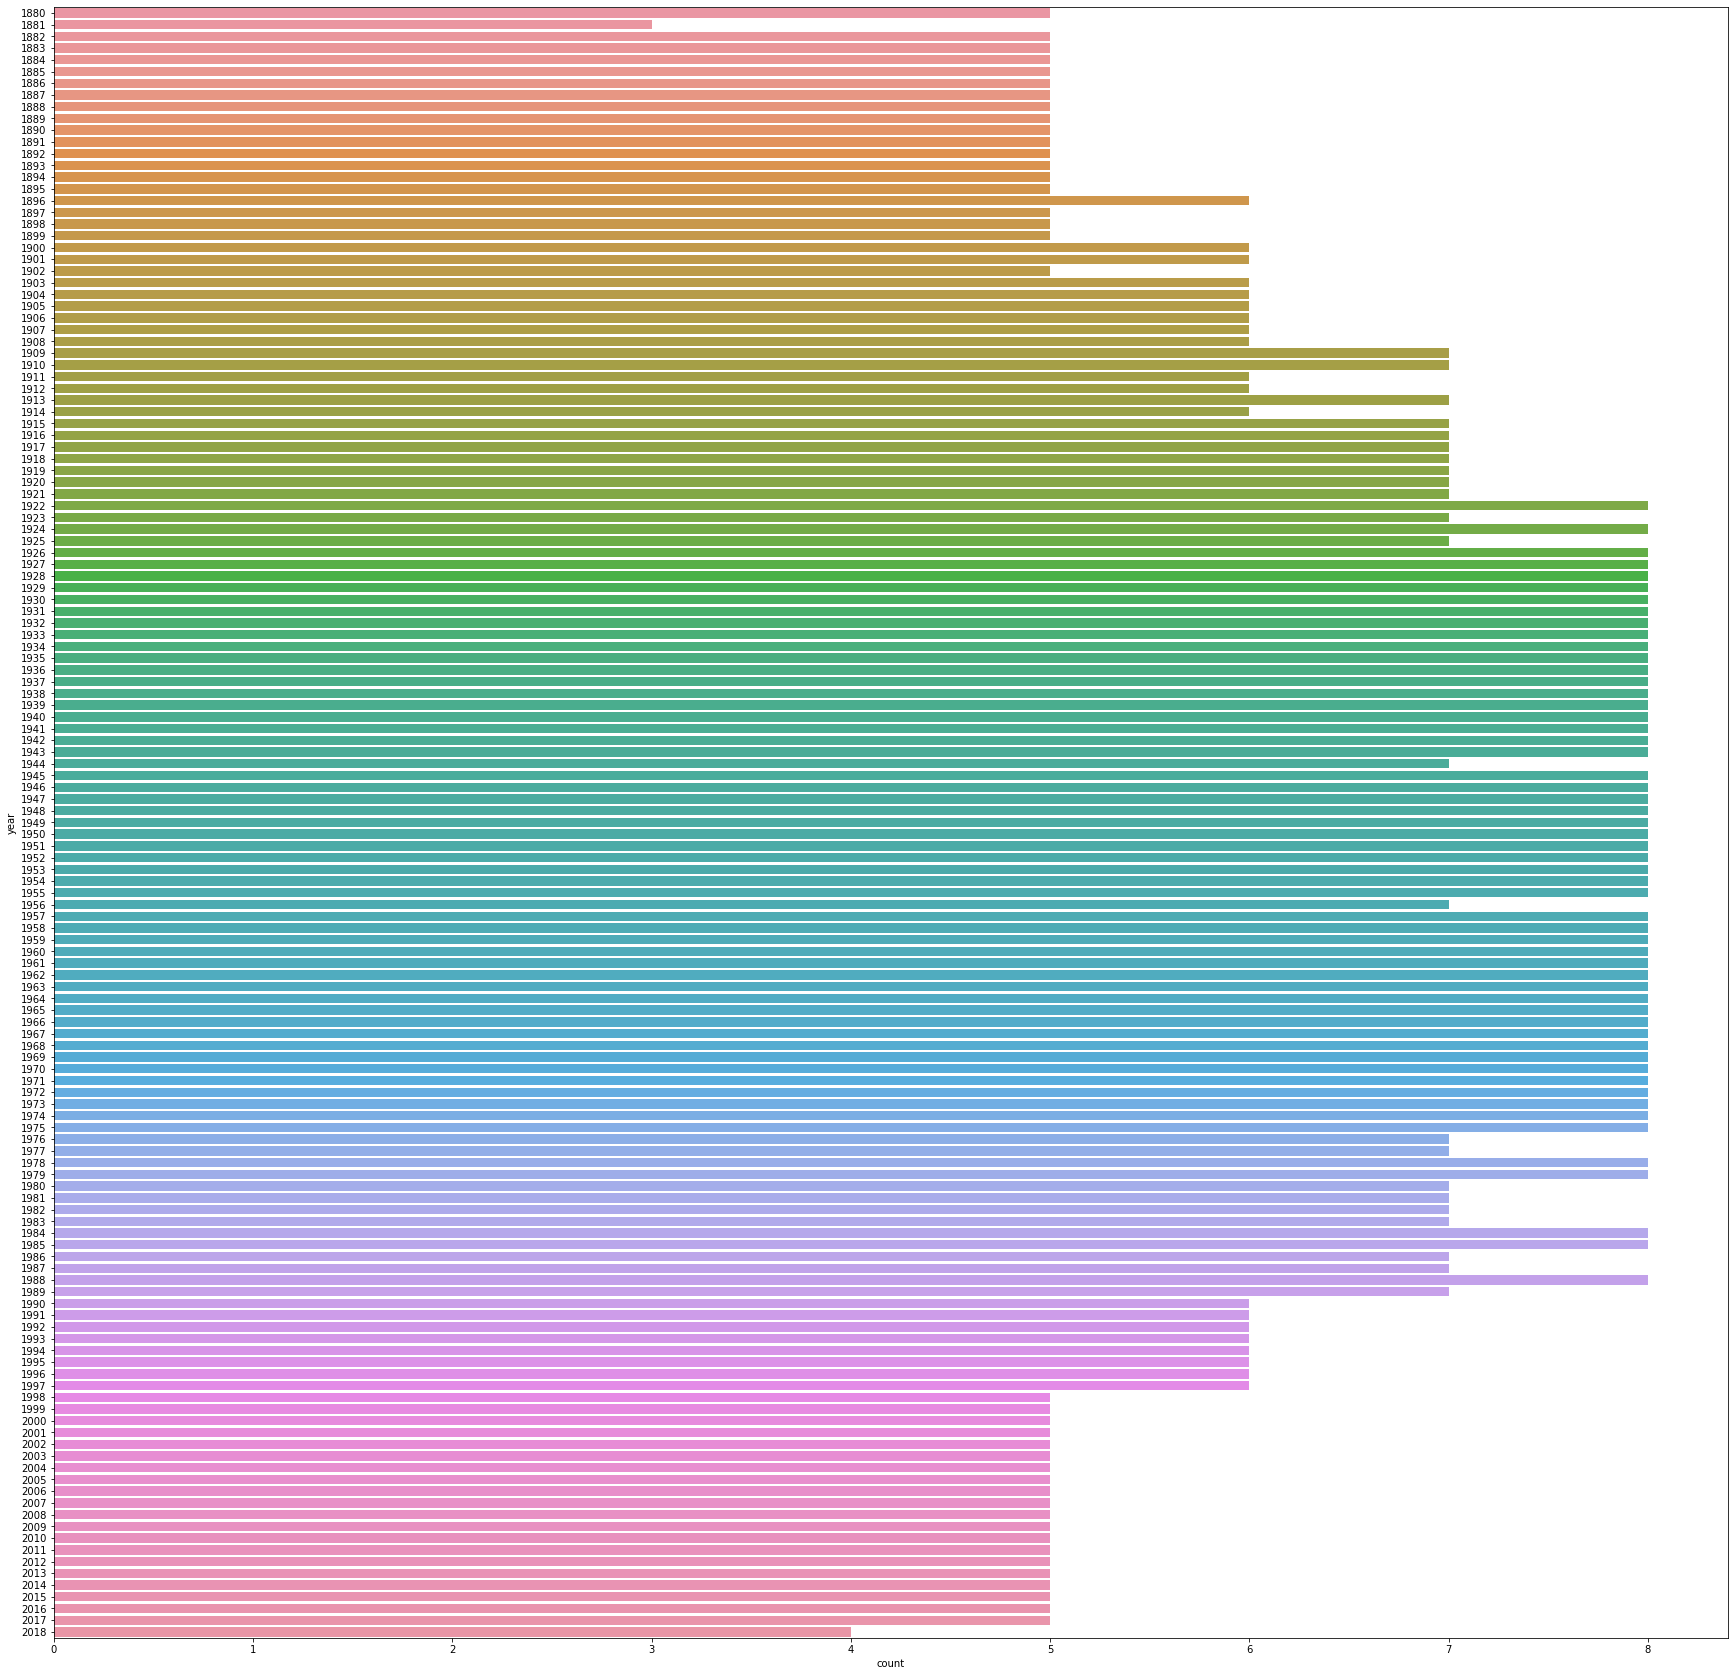

In [395]:
fig = plt.figure(figsize= (30,30))
fig.add_subplot(1,1,1)
sns.countplot(y='year',data=df2)

In [422]:
#

In [423]:
#Vẽ biểu đồ thể hiện sự đa dạng trong việc đặt tên qua các năm theo từng
#giới tính (thể hiện bằng xu hướng giảm dần từng năm của tổng tỷ lệ % của top 1000 tên phổ biến)
df3 = df.groupby(['year','gender']).name.nunique().to_frame()
df3 = df3.rename(columns={'name':'NumberOfUniqueName'}).reset_index()

In [449]:
df3

,year,gender,NumberOfUniqueName,top1k_of_total_pct
0,1880,F,942,106.157113
1,1880,M,1058,94.517958
2,1881,F,938,106.609808
3,1881,M,997,100.300903
4,1882,F,1028,97.276265
...,...,...,...,...
273,2016,M,14174,7.055171
274,2017,F,18375,5.442177
275,2017,M,14215,7.034822
276,2018,F,18029,5.546619


In [451]:
df4 = df3.groupby('year').sum()
df4

,NumberOfUniqueName,top1k_of_total_pct
year,,
1880,2000,200.675071
1881,1935,206.910711
1882,2127,188.268075
1883,2084,191.964039
1884,2297,174.213121
...,...,...
2014,33243,12.327201
2015,33121,12.365654
2016,33010,12.364154


In [455]:
df4['top1k_of_total_pct'] = df4['NumberOfUniqueName'].apply(lambda x: (1000/x)*100)
df4.reset_index().head()

,year,NumberOfUniqueName,top1k_of_total_pct
0,1880,2000,50.000000
1,1881,1935,51.679587
2,1882,2127,47.014575
3,1883,2084,47.984645
4,1884,2297,43.535046


Int64Index([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889,
            ...
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
           dtype='int64', name='year', length=139)

No handles with labels found to put in legend.


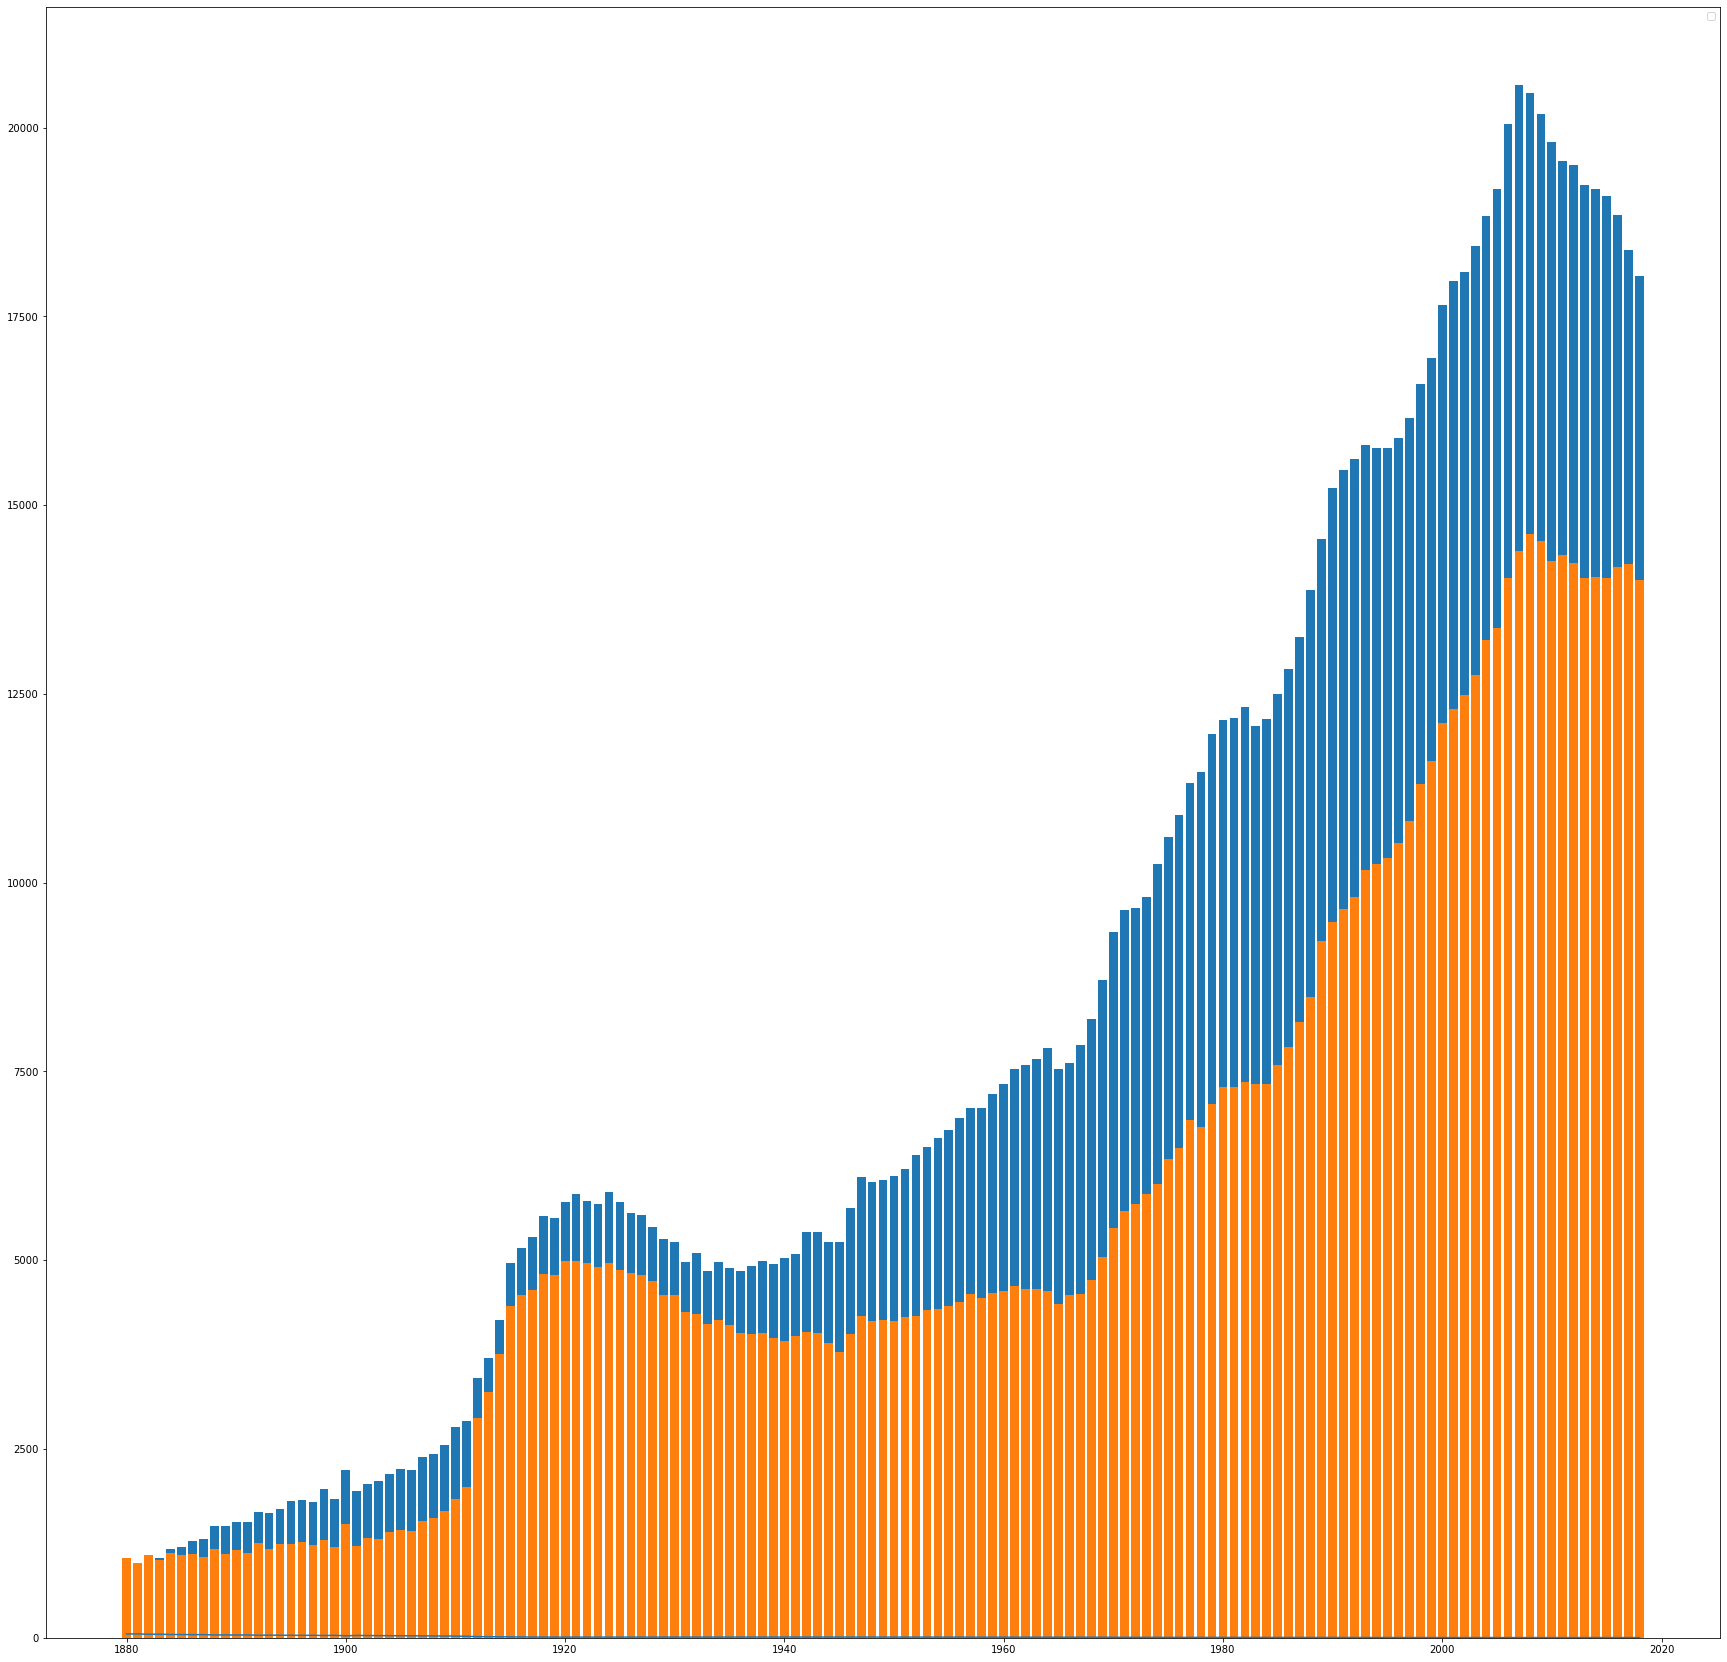

In [464]:
fig = plt.figure(figsize= (30,30))
fig.add_subplot(1,1,1)
plt.bar(df3.query('gender == "F"').year, df3.query('gender == "F"').NumberOfUniqueName)
plt.bar(df3.query('gender == "M"').year, df3.query('gender == "M"').NumberOfUniqueName)
plt.legend()
plt.show()

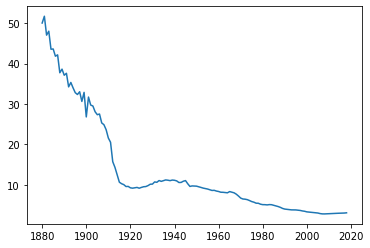

In [466]:
# Xu hướng giảm của tỉ lệ 1000 tên phổ biến / tổng số tên khác nhau theo từng năm
plt.plot(df4.index, df4.top1k_of_total_pct)

In [482]:
#Vẽ biểu đồ thể hiện sự thay đổi trong cách đặt chữ cái đầu tiên trong tên của nam 
#và nữ qua các năm 1900, 1960 và 2018

df.query('year == [1900,1960,2018]')

,name,gender,occurrence,year
0,Mary,F,16706,1900
1,Helen,F,6343,1900
2,Anna,F,6114,1900
3,Margaret,F,5304,1900
4,Ruth,F,4765,1900
...,...,...,...,...
32028,Zylas,M,5,2018
32029,Zyran,M,5,2018
32030,Zyrie,M,5,2018
32031,Zyron,M,5,2018


In [489]:
df5 = df.query('year == [1900,1960,2018]').reset_index()
df5

,index,name,gender,occurrence,year
0,0,Mary,F,16706,1900
1,1,Helen,F,6343,1900
2,2,Anna,F,6114,1900
3,3,Margaret,F,5304,1900
4,4,Ruth,F,4765,1900
...,...,...,...,...,...
47679,32028,Zylas,M,5,2018
47680,32029,Zyran,M,5,2018
47681,32030,Zyrie,M,5,2018
47682,32031,Zyron,M,5,2018


In [491]:
df5['firstword'] = df5['name'].apply(lambda x: x[0])

In [492]:
df5

,index,name,gender,occurrence,year,firstword
0,0,Mary,F,16706,1900,M
1,1,Helen,F,6343,1900,H
2,2,Anna,F,6114,1900,A
3,3,Margaret,F,5304,1900,M
4,4,Ruth,F,4765,1900,R
...,...,...,...,...,...,...
47679,32028,Zylas,M,5,2018,Z
47680,32029,Zyran,M,5,2018,Z
47681,32030,Zyrie,M,5,2018,Z
47682,32031,Zyron,M,5,2018,Z


<AxesSubplot:xlabel='firstword', ylabel='Count'>

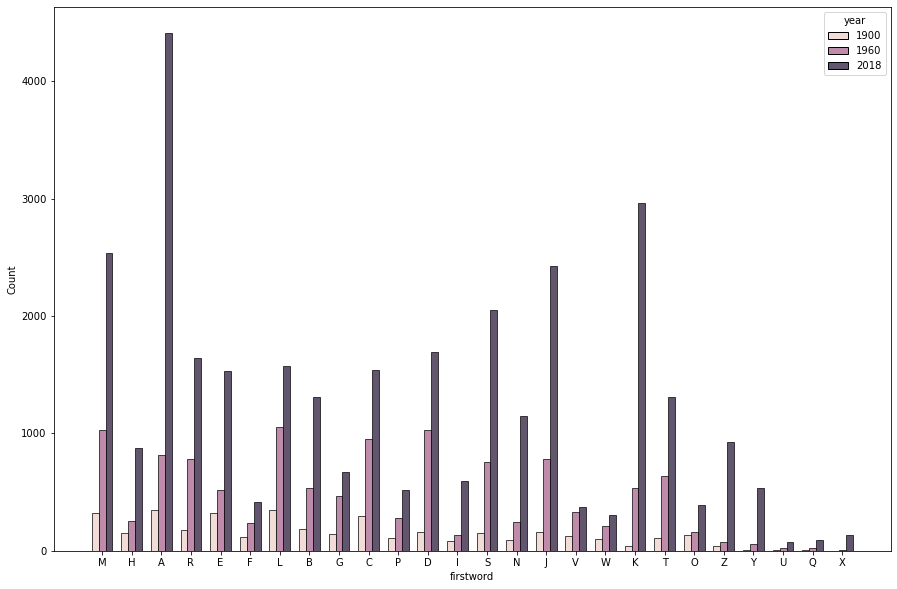

In [501]:
fig = plt.figure(figsize= (15,10))
fig.add_subplot(1,1,1)
sns.histplot(data = df5, x = 'firstword',multiple= 'dodge', hue = 'year', shrink= .7)

In [503]:
#Xác định xu hướng tên con trai biến thành tên con gái và ngược lại. 
#Lấy ví dụ tên có chữ “Lesl…” Ban đầu nam đặt nhiều sau đó giảm, nữ ngược lại.

In [529]:
df.query('name == "Mary"').groupby(['year', 'gender']).count()


name  occurrence
year gender                  
1880 F          1           1
     M          1           1
1881 F          1           1
     M          1           1
1882 F          1           1
...           ...         ...
2014 M          1           1
2015 F          1           1
2016 F          1           1
2017 F          1           1
2018 F          1           1

[270 rows x 2 columns]

<AxesSubplot:xlabel='year', ylabel='Count'>

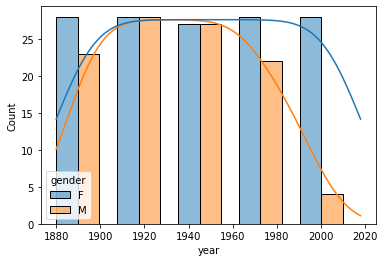

In [544]:
sns.histplot(data = df.query('name == "Helen"'), x = 'year', hue = 'gender', multiple= 'dodge', kde = True, shrink= 0.7, bins = 5)